# Import Required Libraries
Import the necessary libraries, including GeoPandas, Shapely, and Pandas.

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt

data_path = Path('London_UK')

# Load data
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
network = gpd.read_file(data_path / 'network/edges/edges.geojson')

# Load Street Network Data
Load the street network data from a GeoJSON file or other data source.

In [2]:
# Load Street Network Data
streets = network  # Replace with your data source

# Load Image GPS Coordinates
Create a DataFrame with image IDs and their corresponding GPS coordinates.

In [3]:
# Load Image GPS Coordinates
# Create a DataFrame with image IDs and their corresponding GPS coordinates

image_data = {
    'image_id': np.linspace(0, len(panoids) - 1, len(panoids)),
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Create GeoDataFrame for Images
Convert the DataFrame to a GeoDataFrame with Point geometries and set the coordinate reference system (CRS).

In [4]:
# Create GeoDataFrame for Images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join
Use the sjoin_nearest function to find the nearest street for each image and add the distance information.

In [5]:
# Perform Spatial Join
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')

# Now 'matched' contains street information for each image
matched[['image_id', 'longitude', 'latitude', 'distance'][:5][0:2]]
matched_first_row = matched.iloc[[8]]

print(matched_first_row[['image_id', 'longitude', 'latitude', 'distance']])


c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


   image_id  longitude   latitude  distance
8       8.0  -0.111446  51.510339  0.000574


In [6]:
def get_image_id_by_coords(lat, lon):
    # Find the row in the matched DataFrame that matches the given coordinates
    row = matched[(matched['latitude'] == lat) & (matched['longitude'] == lon)]
    
    if not row.empty:
        return row['image_id'].values[0]
    else:
        return None

# Example usage
latitude = 51.51033857385067  # Replace with the desired latitude
longitude = -0.1114464626242011  # Replace with the desired longitude
image_id = get_image_id_by_coords(latitude, longitude)

if image_id is not None:
    print(f"Image ID for coordinates ({latitude}, {longitude}): {image_id}")
else:
    print(f"No image found for coordinates ({latitude}, {longitude})")

Image ID for coordinates (51.51033857385067, -0.1114464626242011): 8.0


# Display Matched Results
Print or visualize the matched results, including image IDs and distances to the nearest streets.

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


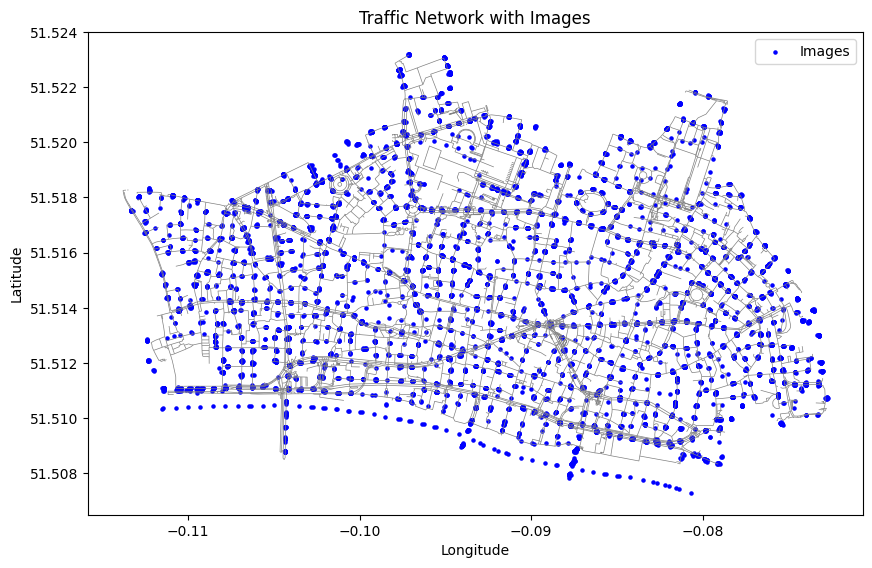

In [7]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3', ...],
#     'lng': [-0.10543, -0.0949, -0.10601, ...],
#     'lat': [51.51575, 51.51736, 51.51575, ...]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')
# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()

plt.show()

In [8]:
# Re-project the streets GeoDataFrame to a projected CRS
# EPSG:27700 is the British National Grid, suitable for the UK
streets_projected = streets.to_crs(epsg=28992)

# Calculate the length of each street in the projected CRS
streets_length = streets_projected.length

# Add the lengths back to the original GeoDataFrame if needed
streets['length'] = streets_length


# Now you can use 'streets['length']' for further analysis

Buffer function python


In [9]:
import geopandas as gpd
from shapely.geometry import LineString

def split_line(line, max_segment_length=50):
    # Calculate the number of segments
    num_segments = int(line.length // max_segment_length) + 1
    segment_length = line.length / num_segments
    
    # Create a list to store the segments
    segments = []
    
    # Generate points along the line at each segment length
    for i in range(num_segments):
        start_point = line.interpolate(i * segment_length)
        end_point = line.interpolate(min((i + 1) * segment_length, line.length))
        segment = LineString([start_point, end_point])
        segments.append(segment)
    
    return segments

# Load the streets data
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Re-project to a suitable CRS if necessary
if streets.crs.is_geographic:
    streets = streets.to_crs(epsg=28992)  # Use a projected CRS like EPSG:28992 for the Netherlands

# Calculate lengths
streets['length'] = streets.length

# Split lines longer than 100 meters
split_segments = []
for _, row in streets.iterrows():
    if row['length'] > 100:
        split_segments.extend(split_line(row['geometry'], max_segment_length=50))
    else:
        split_segments.append(row['geometry'])

# Create a new GeoDataFrame with the split segments
split_streets_gdf_max = gpd.GeoDataFrame(geometry=split_segments, crs=streets.crs)

# Optionally, calculate the new lengths
split_streets_gdf_max_L = split_streets_gdf_max.length

# Display the result
print(split_streets_gdf_max)


                                               geometry
0     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...
1     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...
2     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...
3     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...
4     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...
...                                                 ...
5807  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...
5808  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...
5809  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...
5810  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...
5811  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...

[5812 rows x 1 columns]


In [10]:
# Assuming split_streets_gdf_max and split_streets_gdf_max_L are already defined

# Add the lengths as a new column to the GeoDataFrame
split_streets_gdf_max['length'] = split_streets_gdf_max_L

# Now split_streets_gdf_max contains the length of each segment as a column
print(split_streets_gdf_max)

                                               geometry     length
0     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  32.202141
1     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  45.345370
2     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  45.345382
3     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  38.105447
4     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  27.635476
...                                                 ...        ...
5807  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  33.118631
5808  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  37.884646
5809  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  37.805940
5810  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...   3.009515
5811  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  94.399716

[5812 rows x 2 columns]


In [11]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import linemerge

def merge_short_lines(streets_gdf, min_total_length=50, max_individual_length=10):
    merged_segments = []
    current_merge = []

    for _, row in streets_gdf.iterrows():
        line = row['geometry']
        line_length = line.length

        if line_length < max_individual_length:
            current_merge.append(line)
            total_length = sum([seg.length for seg in current_merge])

            if total_length >= min_total_length:
                merged_line = linemerge(current_merge)
                merged_segments.append(merged_line)
                current_merge = []
        else:
            if current_merge:
                merged_line = linemerge(current_merge)
                merged_segments.append(merged_line)
                current_merge = []
            merged_segments.append(line)

    # If there are any remaining lines in the current merge, add them
    if current_merge:
        merged_line = linemerge(current_merge)
        merged_segments.append(merged_line)

    return gpd.GeoDataFrame(geometry=merged_segments, crs=streets_gdf.crs)



# Merge short lines
merged_streets_gdf = merge_short_lines(split_streets_gdf_max)

# Optionally, calculate the new lengths
merged_streets_gdf['length'] = merged_streets_gdf.length

merged_streets_gdf


geometry     length
0     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  32.202141
1     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  45.345370
2     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  45.345382
3     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  38.105447
4     LINESTRING (-2.25e+05 4.05e+05, -2.25e+05 4.05...  27.635476
...                                                 ...        ...
5029  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  33.118631
5030  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  37.884646
5031  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  37.805940
5032  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...   3.009515
5033  LINESTRING (-2.24e+05 4.07e+05, -2.24e+05 4.07...  94.399716

[5034 rows x 2 columns]

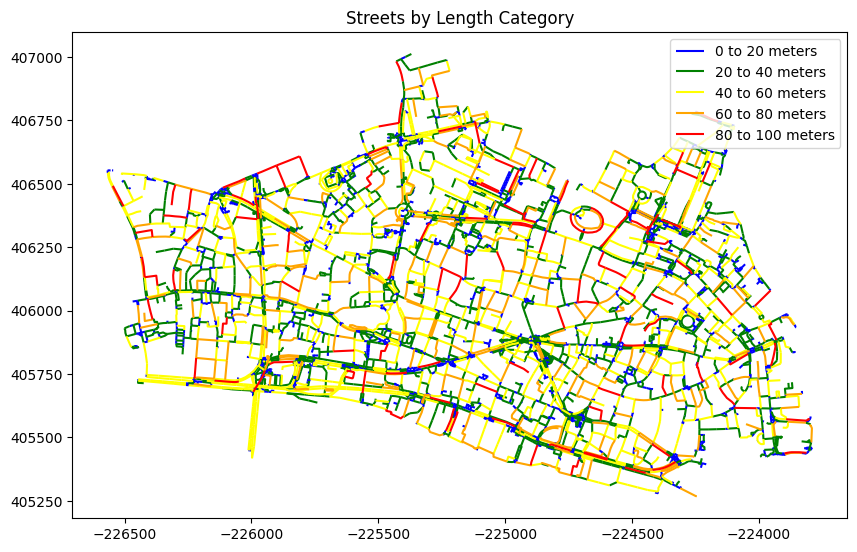

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to categorize lengths and assign colors
def categorize_and_plot(gdf):
    # Define the bins and corresponding colors
    bins = [0, 20, 40, 60, 80, 100]
    colors = ['blue', 'green', 'yellow', 'orange', 'red']
    
    # Create a new column 'category' based on the length
    gdf['category'] = np.digitize(gdf['length'], bins, right=True)
    
    # Plot each category with a different color
    fig, ax = plt.subplots(figsize=(10, 10))
    for i, color in enumerate(colors, start=1):
        category_gdf = gdf[gdf['category'] == i]
        if not category_gdf.empty:
            category_gdf.plot(ax=ax, color=color, label=f'{bins[i-1]} to {bins[i]} meters')
    
    plt.title('Streets by Length Category')
    plt.legend()
    plt.show()



# Call the function to categorize and plot
categorize_and_plot(merged_streets_gdf)

In [13]:
# import geopandas as gpd

# # Load the streets data if not already loaded
# streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# # Iterate over each pair of LineStrings to find intersections
# for i , line1 in enumerate(streets['geometry']):
#     for j, line2 in enumerate(streets['geometry']):
#         if i >= j:  # Avoid duplicate checks and self-intersection
#             continue
#         if line1.intersects(line2):
#             print(f"LineString at index {i} intersects with LineString at index {j}.")
#             print(f"LineString {i}: {line1}")
#             print(f"LineString {j}: {line2}")
#             break  # Stop after finding the first intersection
#     else:
#         continue
#     break

In [14]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint

# Load the streets data if not already loaded
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Create a list to store intersection points
intersection_points = []

# Iterate over each pair of LineStrings to find intersections
for i, line1 in enumerate(streets['geometry'][:100]):
    for j, line2 in enumerate(streets['geometry'][:100]):
        if i >= j:  # Avoid duplicate checks and self-intersection
            continue
        if line1.intersects(line2):
            intersection = line1.intersection(line2)
            if intersection.geom_type == 'Point':
                intersection_points.append(intersection)
            elif intersection.geom_type == 'MultiPoint':
                intersection_points.extend(intersection.geoms)

# Create a GeoDataFrame for the intersection points
intersection_gdf = gpd.GeoDataFrame(geometry=intersection_points, crs=streets.crs)

# Display the first few rows of the GeoDataFrame
print(intersection_gdf.head())

                   geometry
0   POINT (-0.08535 51.509)
1   POINT (-0.08535 51.509)
2  POINT (-0.083659 51.509)
3  POINT (-0.085886 51.509)
4  POINT (-0.085886 51.509)


In [15]:
# Remove duplicate points, keeping only the first occurrence
intersection_gdf_unique = intersection_gdf.drop_duplicates(subset='geometry')

# Print the resulting GeoDataFrame
len(intersection_gdf_unique)

69

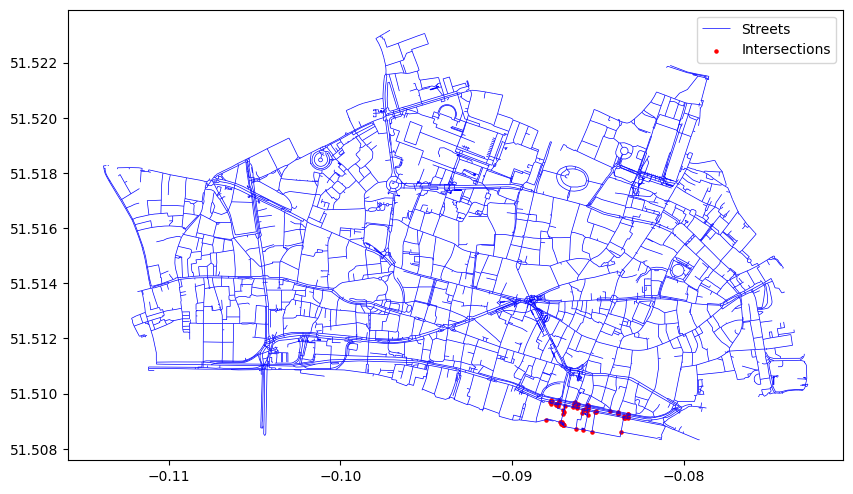

In [16]:

# Assuming intersection_gdf is already created and contains intersection points
# intersection_gdf = gpd.GeoDataFrame(...)  # Your existing intersection GeoDataFrame

# Plot the streets and intersection points
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='blue', linewidth=0.5, label='Streets')
intersection_gdf_unique.plot(ax=ax, color='red', marker='o', markersize=5, label='Intersections')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [17]:
intersection_gdf_unique.explore()

In [18]:
import geopandas as gpd
from shapely.geometry import LineString, Point
from shapely.ops import split

# Load the streets data if not already loaded
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Ensure intersection points are unique
intersection_points = intersection_gdf_unique['geometry'].unique()

# Function to split a line at given points
def split_line_at_points(line, points):
    # Sort points along the line
    points = sorted(points, key=lambda point: line.project(point))
    # Split the line at each point
    segments = []
    for point in points:
        # Split the line at the point
        split_result = split(line, point)
        # Add the segments to the list
        segments.extend(split_result.geoms)
    return segments

# List to store the split lines
split_lines = []

# Iterate over each line in the streets GeoDataFrame
for line in streets['geometry']:
    # Find intersection points that lie on the current line
    line_points = [point for point in intersection_points if line.intersects(point)]
    if line_points:
        # Split the line at these points
        split_segments = split_line_at_points(line, line_points)
        split_lines.extend(split_segments)
    else:
        # If no intersection points, add the line as is
        split_lines.append(line)

# Create a new GeoDataFrame with the split lines
split_streets_gdf = gpd.GeoDataFrame(geometry=split_lines, crs=streets.crs)

# Display the result
print(split_streets_gdf)

                                               geometry
0     LINESTRING (-0.083659 51.509, -0.083712 51.508...
1     LINESTRING (-0.083659 51.509, -0.083712 51.508...
2        LINESTRING (-0.085886 51.509, -0.08535 51.509)
3        LINESTRING (-0.085886 51.509, -0.08535 51.509)
4     LINESTRING (-0.085886 51.509, -0.086233 51.509...
...                                                 ...
5557    LINESTRING (-0.080744 51.521, -0.080545 51.521)
5558    LINESTRING (-0.080744 51.521, -0.081099 51.521)
5559  LINESTRING (-0.081004 51.522, -0.080984 51.522...
5560       LINESTRING (-0.0808 51.522, -0.08076 51.522)
5561  LINESTRING (-0.08076 51.522, -0.079787 51.522,...

[5562 rows x 1 columns]


In [19]:
split_streets_gdf.length

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\713506677.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  split_streets_gdf.length


0       0.001836
1       0.001836
2       0.000541
3       0.000541
4       0.000396
          ...   
5557    0.000206
5558    0.000365
5559    0.001572
5560    0.000042
5561    0.001314
Length: 5562, dtype: float64

In [20]:
import geopandas as gpd

# Ensure the GeoDataFrame is in a projected CRS
# For example, using EPSG:27700 (British National Grid) or any other suitable projected CRS
if split_streets_gdf.crs.is_geographic:
    split_streets_gdf = split_streets_gdf.to_crs(epsg=27700)

# Calculate the length of each LineString
split_streets_gdf['length'] = split_streets_gdf.length

# Display the result
print(split_streets_gdf[['geometry', 'length']])

                                               geometry      length
0     LINESTRING (5.33e+05 1.81e+05, 5.33e+05 1.81e+...  135.901812
1     LINESTRING (5.33e+05 1.81e+05, 5.33e+05 1.81e+...  135.901812
2     LINESTRING (5.33e+05 1.81e+05, 5.33e+05 1.81e+05)   38.068030
3     LINESTRING (5.33e+05 1.81e+05, 5.33e+05 1.81e+05)   38.068030
4     LINESTRING (5.33e+05 1.81e+05, 5.33e+05 1.81e+...   27.608309
...                                                 ...         ...
5557  LINESTRING (5.33e+05 1.82e+05, 5.33e+05 1.82e+05)   14.891266
5558  LINESTRING (5.33e+05 1.82e+05, 5.33e+05 1.82e+05)   26.361131
5559  LINESTRING (5.33e+05 1.82e+05, 5.33e+05 1.82e+...  113.541814
5560  LINESTRING (5.33e+05 1.82e+05, 5.33e+05 1.82e+05)    3.006542
5561  LINESTRING (5.33e+05 1.82e+05, 5.33e+05 1.82e+...   94.306510

[5562 rows x 2 columns]


In [21]:
import geopandas as gpd
import folium  # Import folium for map controls



# Ensure intersection_gdf_unique is in the same CRS as streets
intersection_gdf_unique = intersection_gdf_unique.to_crs(streets.crs)

# Use the .explore() method to visualize both GeoDataFrames
m = split_streets_gdf.explore(
    color='blue',  # Color for streets
    tooltip='length',  # Tooltip to show length if available
    name='Streets'
)

intersection_gdf_unique.explore(
    m=m,
    color='red',  # Color for intersection points
    marker_kwds={'radius': 5},  # Marker size for points
    name='Intersection Points'
)

# Add layer control to toggle between layers
m.add_child(folium.LayerControl())

# Display the map
m


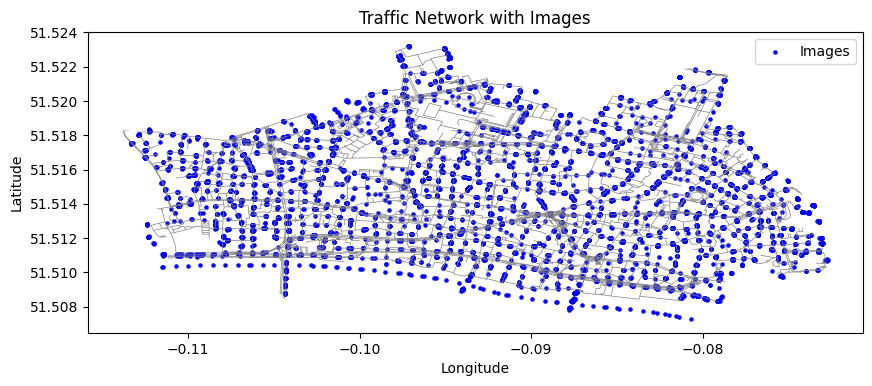

In [22]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3', ...],
#     'lng': [-0.10543, -0.0949, -0.10601, ...],
#     'lat': [51.51575, 51.51736, 51.51575, ...]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=27700)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, split_streets_gdf, how='left', distance_col='distance')
# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()

plt.show()

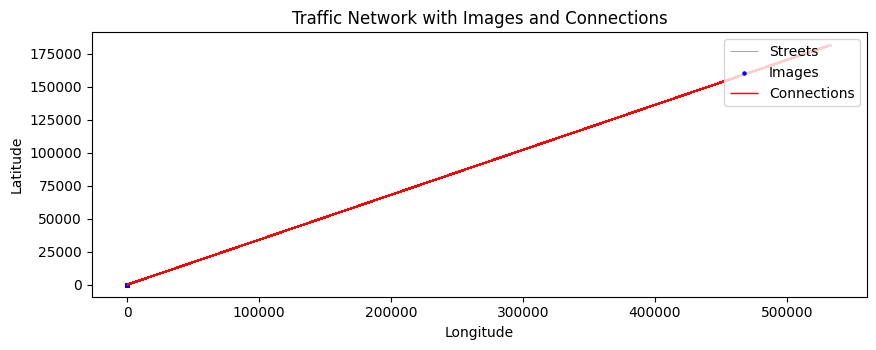

In [23]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=split_streets_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, split_streets_gdf, how='left', distance_col='distance')

# Create lines connecting images to their nearest street
connecting_lines = []
for idx, row in matched.iterrows():
    image_point = row['geometry']
    nearest_line_index = row['index_right']  # This is the index of the nearest line
    nearest_line = split_streets_gdf.loc[nearest_line_index, 'geometry']  # Get the actual LineString
    connecting_line = LineString([image_point, nearest_line.interpolate(nearest_line.project(image_point))])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=split_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
split_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()

plt.show()

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


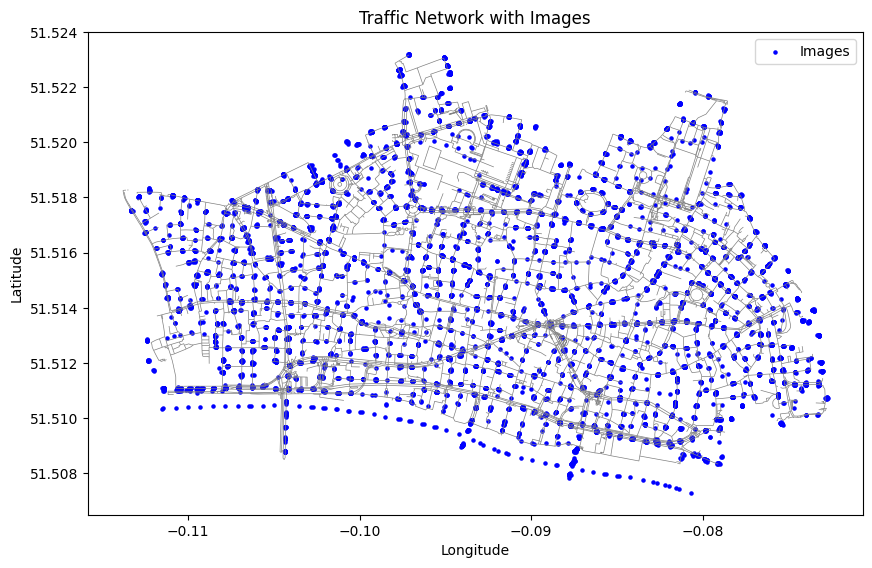

In [24]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]


images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, merged_streets_gdf, how='left', distance_col='distance')

# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()
plt.show()

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


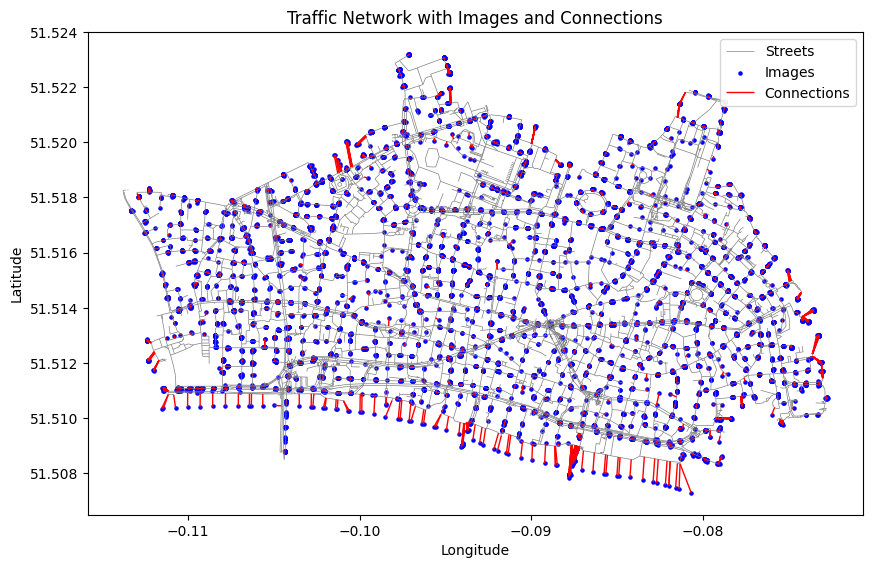

In [25]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, merged_streets_gdf, how='left', distance_col='distance')

# Create lines connecting images to their nearest street
connecting_lines = []
for idx, row in matched.iterrows():
    image_point = row['geometry']
    nearest_line_index = row['index_right']  # This is the index of the nearest line
    nearest_line = merged_streets_gdf.loc[nearest_line_index, 'geometry']  # Get the actual LineString
    connecting_line = LineString([image_point, nearest_line.interpolate(nearest_line.project(image_point))])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=merged_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()




In [26]:
len(matched)

9137

In [27]:
len(connecting_lines_gdf)

9137

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


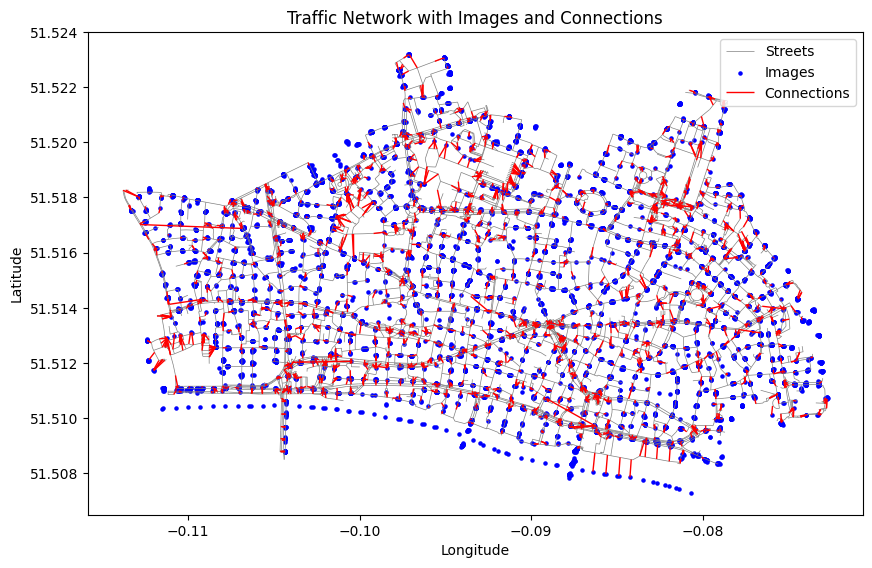

In [28]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest image for each street segment
matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# Create lines connecting each street segment to its nearest image
connecting_lines = []
for idx, row in matched.iterrows():
    line_segment = row['geometry']
    nearest_image_index = row['index_right']  # This is the index of the nearest image
    nearest_image_point = images_gdf.loc[nearest_image_index, 'geometry']  # Get the actual Point
    connecting_line = LineString([line_segment.interpolate(line_segment.project(nearest_image_point)), nearest_image_point])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=merged_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


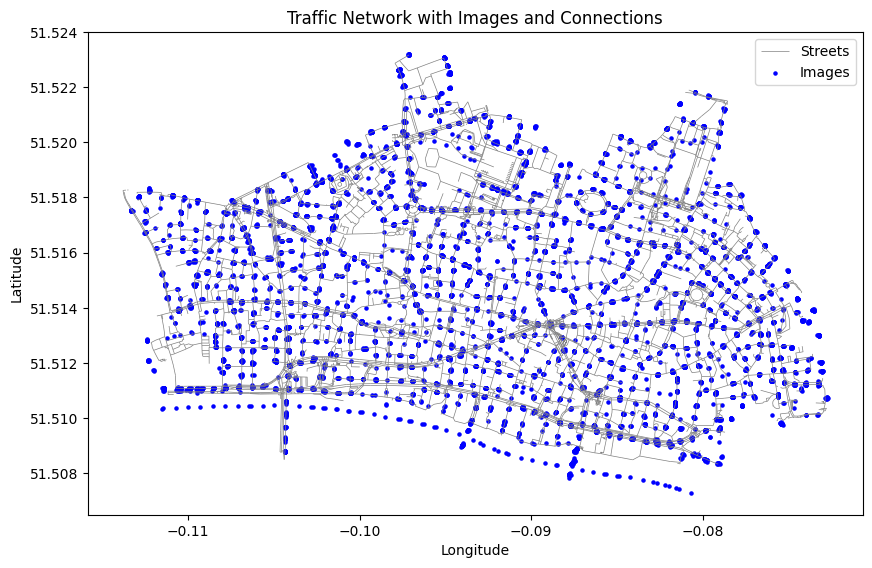

In [29]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest image for each street segment
matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# Sort by distance and drop duplicates to keep only the closest image per street
matched = matched.sort_values(by='distance').drop_duplicates(subset='index_right')



# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')


# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()

In [30]:
matched.head()

geometry     length  category  \
3433      LINESTRING (-0.10162 51.517, -0.10144 51.517)  46.752228         3   
2480  LINESTRING (-0.07906 51.514, -0.079023 51.514,...  55.499614         3   
1573       LINESTRING (-0.1049 51.513, -0.10494 51.513)  36.906024         2   
2766    LINESTRING (-0.077139 51.515, -0.077862 51.515)  75.137535         4   
144       LINESTRING (-0.089131 51.51, -0.089097 51.51)   5.241560         1   

      index_right  image_id                  panoid  longitude   latitude  \
3433         3110      3110  Lxjlfeqma-fmmp7bqx2z2A  -0.101598  51.516877   
2480         6554      6554  pCoL-Vcale4s9OeByQoVhQ  -0.078707  51.513825   
1573          621       621  WO_hwz7ESVTcBXTj7dE-3w  -0.104931  51.512950   
2766         8249      8249  LPVPWF5yzUrYNofMZiBtQQ  -0.077190  51.515277   
144          4747      4747  0BST0dIwMfDw0nFeg1pLrQ  -0.089108  51.510121   

          distance  
3433  2.902489e-09  
2480  3.985740e-09  
1573  6.249499e-09  
2766  8.554293e-09  
144   1.219231e-08

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


KeyboardInterrupt: 

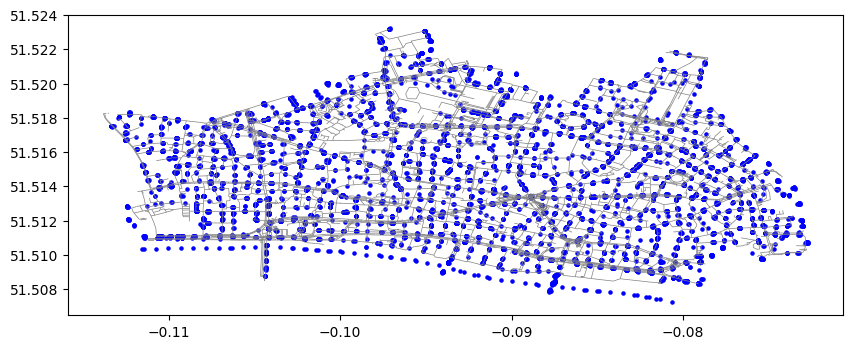

In [31]:
# import geopandas as gpd
# from shapely.geometry import Point, LineString
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# # Example:
# # panoids = pd.DataFrame({
# #     'panoid': ['id1', 'id2', 'id3'],
# #     'lng': [-0.10543, -0.0949, -0.10601],
# #     'lat': [51.51575, 51.51736, 51.51575]
# # })

# # Create a DataFrame with image IDs and their corresponding GPS coordinates
# image_data = {
#     'image_id': np.arange(len(panoids)),
#     'panoid': panoids.panoid,
#     'longitude': panoids.lng,
#     'latitude': panoids.lat,
# }
# images_df = pd.DataFrame(image_data)

# # Create GeoDataFrame for images
# geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
# images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# # Ensure merged_streets_gdf is in the same CRS as images_gdf
# merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# # Perform Spatial Join to find nearest image for each street segment
# matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# # Sort by distance
# matched = matched.sort_values(by='distance')

# # Keep track of used image IDs
# used_image_ids = set()
# selected_matches = []

# # Iterate over the sorted matches
# for idx, row in matched.iterrows():
#     image_id = row['image_id']
#     if image_id not in used_image_ids:
#         selected_matches.append(row)
#         used_image_ids.add(image_id)

# # Create a GeoDataFrame for the selected matches
# selected_matches_gdf = gpd.GeoDataFrame(selected_matches, crs=merged_streets_gdf.crs)

# # Visualize the traffic network with images and connecting lines
# fig, ax = plt.subplots(figsize=(10, 10))
# merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
# images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# # Plot connections
# for idx, row in selected_matches_gdf.iterrows():
#     line_segment = row['geometry']
#     nearest_image_point = images_gdf.loc[row['index_right'], 'geometry']
#     connecting_line = LineString([line_segment.interpolate(line_segment.project(nearest_image_point)), nearest_image_point])
#     gpd.GeoSeries([connecting_line]).plot(ax=ax, color='red', linewidth=1)

# # Add labels and legend
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Traffic Network with Images and Connections')
# plt.legend()
# plt.show()

In [32]:
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\2300134311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)


In [33]:
merged_streets_gdf['buffer']


0       POLYGON ((6.2857 32.55, 4.3968 32.017, 2.4647 ...
1       POLYGON ((-2.4162 31.645, -4.3519 31.969, -6.2...
2       POLYGON ((-2.3708 31.64, -4.3073 31.959, -6.20...
3       POLYGON ((2.5691 71.332, 4.4993 70.976, 6.3853...
4       POLYGON ((-1.6857 31.573, -1.6848 31.584, -3.3...
                              ...                        
5029    POLYGON ((1.1351 71.485, 3.086 71.27, 5.0064 7...
5030    POLYGON ((3.9048 71.121, 5.8067 70.636, 7.6518...
5031    POLYGON ((2.9105 71.297, 4.8344 70.909, 6.711 ...
5032    POLYGON ((4.5322 70.983, 6.4174 70.437, 8.2401...
5033    POLYGON ((2.5578 71.345, 2.5581 71.347, 2.5584...
Name: buffer, Length: 5034, dtype: geometry

In [34]:
from shapely.geometry import LineString
from shapely.geometry import mapping
from shapely.ops import unary_union

# Define your LineString
line = LineString([(0, 0), (10, 10), (20, 0)])

# Create a buffer of 20 meters around the LineString
buffered_zone = line.buffer(20)

# Print or visualize the buffer
print(buffered_zone)


POLYGON ((-4.142135623730949 24.14213562373095, -2.687865683272907 25.46020906725474, -1.11140466039204 26.62939224605091, 0.5720652634800452 27.6384252869671, 2.346331352698206 28.47759065022574, 4.194306454910757 29.13880671464418, 6.098193559677436 29.61570560806461, 8.039657193408788 29.90369453344394, 10 30, 11.96034280659122 29.90369453344394, 13.90180644032257 29.61570560806461, 15.80569354508925 29.13880671464418, 17.6536686473018 28.47759065022574, 19.42793473651996 27.6384252869671, 21.11140466039205 26.6293922460509, 22.68786568327292 25.46020906725474, 24.14213562373095 24.14213562373095, 34.14213562373095 14.14213562373095, 35.46020906725476 12.68786568327289, 36.62939224605092 11.11140466039202, 37.63842528696711 9.42793473651993, 38.47759065022574 7.653668647301775, 39.13880671464418 5.805693545089228, 39.61570560806462 3.901806440322548, 39.90369453344394 1.960342806591197, 40 -1.332267629550188e-14, 39.90369453344394 -1.960342806591223, 39.6157056080646 -3.901806440322

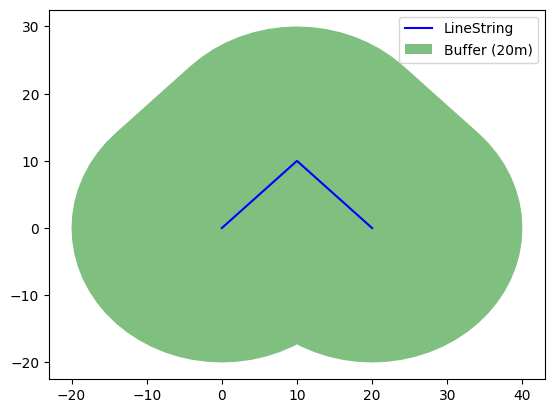

In [35]:
import matplotlib.pyplot as plt

# Plot the original LineString
x, y = line.xy
plt.plot(x, y, color='blue', label='LineString')

# Plot the buffer
x, y = buffered_zone.exterior.xy
plt.fill(x, y, alpha=0.5, fc='green', label='Buffer (20m)')

plt.legend()
plt.show()


In [36]:
panoids.head()

panoid  year  month   owner        lat       lng   ask_lng  \
0  wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827 -0.107849   
1  ITjfv5l9KG5ImWa7eTOzAw  2013      8  Google  51.510418 -0.107077 -0.107130   
2  WeKFQgVRtO_lzp_4gT1HQw  2013      8  Google  51.510413 -0.108574 -0.108569   
3  Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627 -0.108540   
4  AU89QzVV0jU915gldn3wrQ  2012      5  Google  51.510957 -0.108001 -0.107821   

     ask_lat  consulted       dist   angle  \
0  51.510254          1  52.594483  -2.042   
1  51.510236          1  51.758882  -0.983   
2  51.510271          1  53.597746  -0.960   
3  51.510720          1   2.179497  -1.842   
4  51.510703          1   0.275642 -78.482   

                                          url_side_a  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                           url_front  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                          url_side_b  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                            url_back        im_side_a  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_0_s_a.png   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_1_s_a.png   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_2_s_a.png   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_3_s_a.png   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_4_s_a.png   

        im_front        im_side_b        im_back                 geometry  
0  image_0_f.png  image_0_s_b.png  image_0_b.png   POINT (-0.10783 51.51)  
1  image_1_f.png  image_1_s_b.png  image_1_b.png   POINT (-0.10708 51.51)  
2  image_2_f.png  image_2_s_b.png  image_2_b.png   POINT (-0.10857 51.51)  
3  image_3_f.png  image_3_s_b.png  image_3_b.png  POINT (-0.10863 51.511)  
4  image_4_f.png  image_4_s_b.png  image_4_b.png    POINT (-0.108 51.511)

       line_id                  panoid       lng        lat
0            5  xdou9yN5jG9HVTpAHFIKNA -0.085451  51.509351
1            6  1-KfA6fIxR0P8DPXQVwe1Q -0.085499  51.509436
2            6  fcINk0qxC7j6bexbRccWpA -0.085464  51.509437
3            6  Yc4p5GbCANBiE8-LUmJJYw -0.085451  51.509434
4            6  Ym72WsFbvhBpr0D19DxasA -0.085429  51.509405
...        ...                     ...       ...        ...
64761     5033  Vyv2AVAtNUsQaiJkV0vbBw -0.080453  51.521826
64762     5033  mIgXqblx4o94lnfnbg-etA -0.080415  51.521814
64763     5033  hVVggHCCtZ1q2zUBA2Lubg -0.080423  51.521812
64764     5033  BQJZmwnQ8GJvDeEFn7iHeQ -0.080425  51.521810
64765     5033  IcMZAaZ7XoIJ_Jit2qbNOA -0.080411  51.521811

[64766 rows x 4 columns]


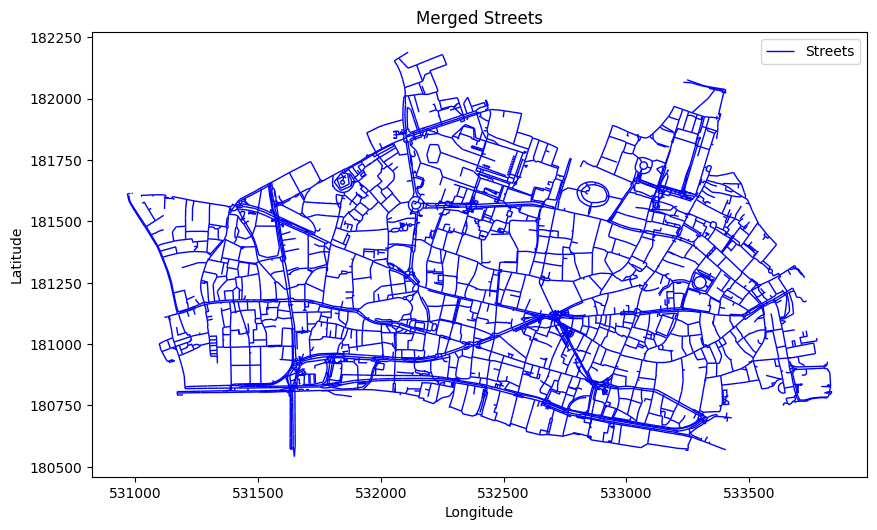

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf is already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Merged Streets')
plt.legend()

# Show the plot
plt.show()

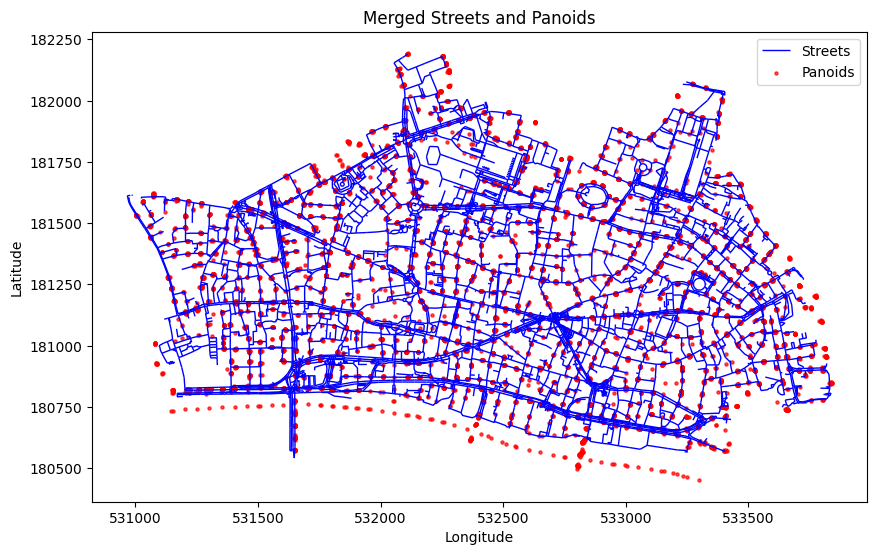

In [39]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Plot the GeoDataFrames based on geometry
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.geometry.plot(ax=ax, color='blue', linewidth=1, label='Streets')
panoids_gdf.geometry.plot(ax=ax, color='red', markersize=5, label='Panoids', alpha=0.7)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Merged Streets and Panoids')
plt.legend()

# Show the plot
plt.show()

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\1613901267.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


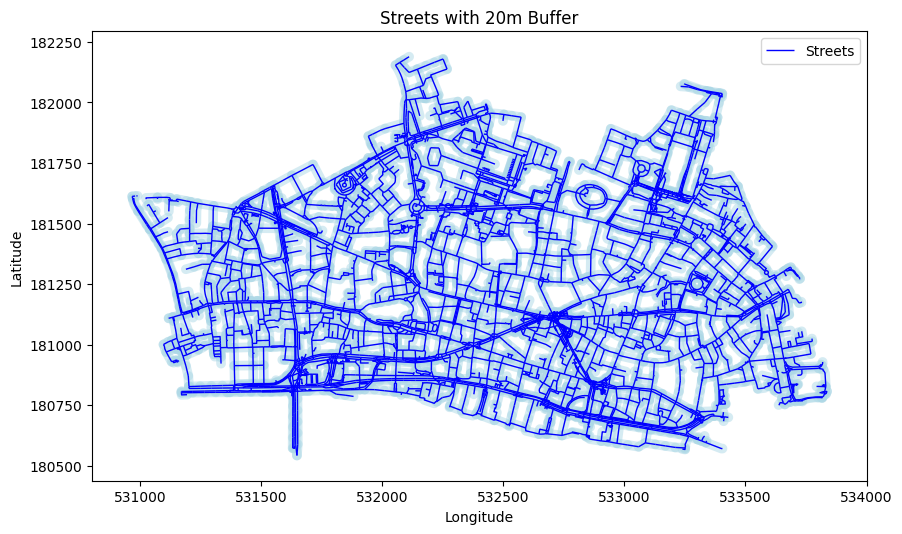

In [40]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf is already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path

# Ensure the GeoDataFrame is in a projected CRS for accurate buffer calculations
if merged_streets_gdf.crs.is_geographic:
    merged_streets_gdf = merged_streets_gdf.to_crs(epsg=27700)  # Example: British National Grid

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Plot the original LineStrings and their buffers
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Streets with 20m Buffer')
plt.legend()

# Show the plot
plt.show()

                      panoid  year  month   owner        lat       lng  \
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
...                      ...   ...    ...     ...        ...       ...   
9011  BQJZmwnQ8GJvDeEFn7iHeQ  2021      4  Google  51.521810 -0.080425   
9011  BQJZmwnQ8GJvDeEFn7iHeQ  2021      4  Google  51.521810 -0.080425   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   

      ask_lng    ask_lat  consulted      dist  ...  \
3    -0.10854  51.510720          1  2.179497  ...   
3  

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\3809311969.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


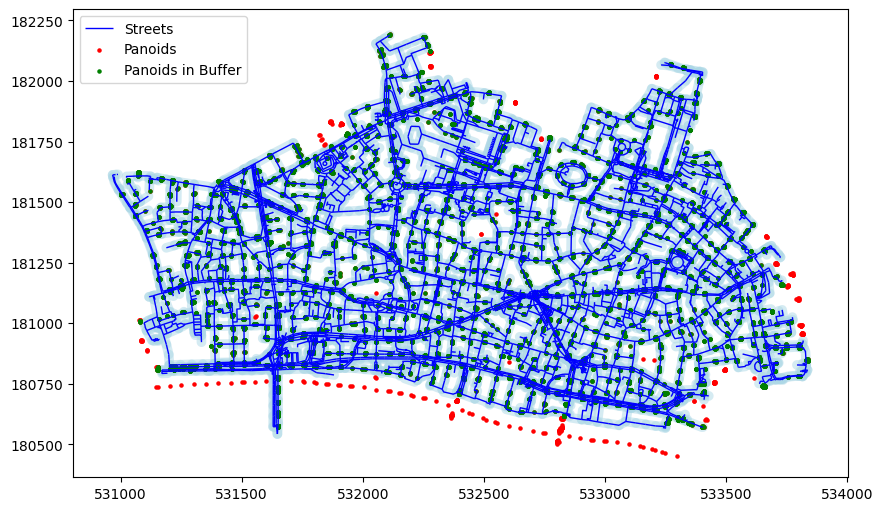

In [41]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(panoids_gdf, merged_streets_gdf.set_geometry('buffer'), how='inner', predicate='within')

# Print the result
print(panoids_in_buffer)

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')
panoids_gdf.plot(ax=ax, color='red', markersize=5, label='Panoids')
panoids_in_buffer.plot(ax=ax, color='green', markersize=5, label='Panoids in Buffer')
plt.legend()
plt.show()

      index_right                                             panoid
0               5                           [xdou9yN5jG9HVTpAHFIKNA]
1               6   [Ym72WsFbvhBpr0D19DxasA, xdou9yN5jG9HVTpAHFIKNA]
2               8                           [xdou9yN5jG9HVTpAHFIKNA]
3               9  [xHxCUvX5chMOydy9WdcHRA, g6G6Rza4wCHAFyyGH1lF0...
4              10  [DW0rSBghzK_zKlEqzFS07w, hO7nswlVtu2Qa9I2y0oLN...
...           ...                                                ...
4292         5028  [VgB1-T_mMoImrsdbc9pAZA, ruQvGAcacOZK2SC3zwoKT...
4293         5029  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4294         5030  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4295         5031  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...
4296         5033  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...

[4297 rows x 2 columns]


C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\2693478304.py:46: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


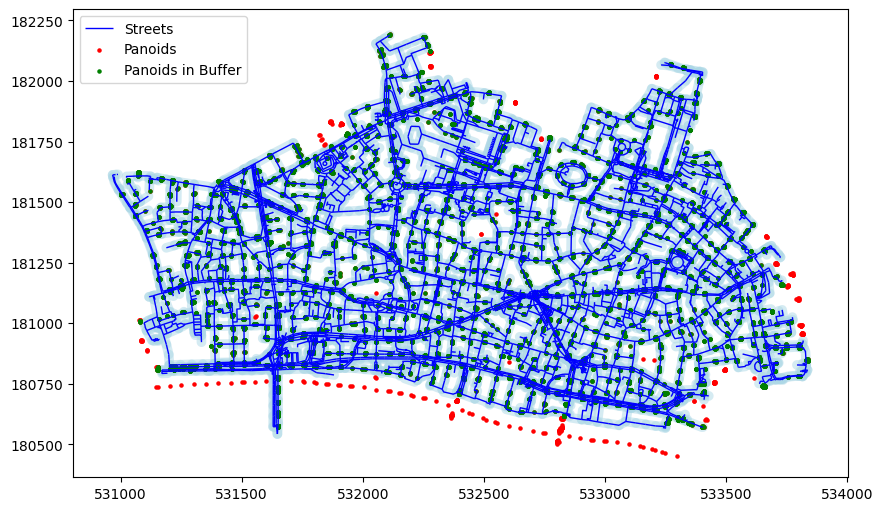

In [42]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(panoids_gdf, merged_streets_gdf.set_geometry('buffer'), how='inner', predicate='within')

# Group by the index of the LineString and aggregate panoids
linestring_panoids = panoids_in_buffer.groupby('index_right')['panoid'].apply(list).reset_index()

# Print the result
print(linestring_panoids)

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')
panoids_gdf.plot(ax=ax, color='red', markersize=5, label='Panoids')
panoids_in_buffer.plot(ax=ax, color='green', markersize=5, label='Panoids in Buffer')
plt.legend()
plt.show()

In [44]:
import pandas as pd

# Example DataFrames
# Assuming panoids DataFrame has a 'panoid' column
# panoids = pd.DataFrame({
#     'panoid': ['wFmLm4GhS7AYVonj6tRIJw', 'ITjfv5l9KG5ImWa7eTOzAw', 'xdou9yN5jG9HVTpAHFIKNA', ...]
# })

# Assuming linestring_panoids DataFrame has a 'panoid' column with lists of panoids
# linestring_panoids = pd.DataFrame({
#     'index_right': [5, 6, 5031, 5033],
#     'panoid': [['xdou9yN5jG9HVTpAHFIKNA'], ['Ym72WsFbvhBpr0D19DxasA', 'xdou9yN5jG9HVTpAHFIKNA'], ['L2RO_RaCf8L8fMwryPqJ9Q'], ['L2RO_RaCf8L8fMwryPqJ9Q', 'zvFAL1gCIrKxLBA6AhLM-']]
# })

# Create a mapping from panoid to index
panoid_to_index = {panoid: index for index, panoid in enumerate(panoids['panoid'])}

# Function to convert panoid list to index list
def convert_panoid_to_index(panoid_list):
    return [panoid_to_index.get(panoid, -1) for panoid in panoid_list]  # Use -1 for panoids not found

# Apply the conversion to the 'panoid' column
linestring_panoids['panoid_index'] = linestring_panoids['panoid'].apply(convert_panoid_to_index)

# Print the updated DataFrame
print(linestring_panoids)

      index_right                                             panoid  \
0               5                           [xdou9yN5jG9HVTpAHFIKNA]   
1               6   [Ym72WsFbvhBpr0D19DxasA, xdou9yN5jG9HVTpAHFIKNA]   
2               8                           [xdou9yN5jG9HVTpAHFIKNA]   
3               9  [xHxCUvX5chMOydy9WdcHRA, g6G6Rza4wCHAFyyGH1lF0...   
4              10  [DW0rSBghzK_zKlEqzFS07w, hO7nswlVtu2Qa9I2y0oLN...   
...           ...                                                ...   
4292         5028  [VgB1-T_mMoImrsdbc9pAZA, ruQvGAcacOZK2SC3zwoKT...   
4293         5029  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...   
4294         5030  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...   
4295         5031  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...   
4296         5033  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...   

                                           panoid_index  
0                                                [4614]  
1                  

In [62]:
import pandas as pd
import os
import shutil

# Base directory where the subdirectories are located
base_dir = 'c:/Users/yigit/OneDrive/Bureaublad/imagedb'

# Define the subdirectories and their corresponding image lists
categories = {
    'residential_road': [
        "410_s_a", "410_f", "410_s_b", "410_b", "417_s_a", "417_s_b", "568_s_a", "568_f", "568_s_b", "619_f",
        "619_s_b", "619_b", "754_f", "754_s_b", "754_b", "806_s_a", "806_f", "806_s_b", "806_b", "981_f",
        "981_b", "1116_s_a", "1116_f", "1116_s_b", "1116_b", "1430_s_a", "1430_f", "1430_s_b", "1430_b",
        "1465_s_b", "1750_s_a", "1750_f", "1750_s_b", "1750_b", "2166_s_a", "2497_f", "2497_b", "3235_s_a",
        "3235_f", "3235_s_b", "3235_b", "3264_f", "3264_b", "3757_s_a", "3757_f", "3757_s_b", "3757_b",
        "3797_s_a", "3797_f", "3797_s_b", "3797_b", "3852_f", "3852_s_b", "3852_b", "4142_s_a", "4142_f",
        "4142_s_b", "4142_b", "4187_s_a", "4187_f", "4187_b", "4787_s_a", "4787_f", "4787_s_b", "4787_b",
        "4810_s_a", "4810_f", "4880_s_a", "4880_f", "4880_s_b", "4880_b", "4985_s_a", "5074_s_a", "5074_f",
        "5074_s_b", "5079_f", "5079_b", "5136_s_a", "5136_f", "5136_s_b", "5136_b", "5160_f", "5160_b",
        "5338_s_a", "5338_f", "5338_s_b", "5338_b", "5379_s_a", "5379_s_b", "5869_f", "5869_s_b", "5869_b",
        "6417_s_a", "6417_f", "6417_s_b", "6417_b", "7028_f", "7028_b", "7039_f", "7039_b", "7486_f",
        "7486_b", "7795_s_a", "7795_f", "7795_b", "7822_s_a", "7822_f", "7822_s_b", "7822_b", "8285_f",
        "8324_s_a", "8324_s_b", "8346_s_a", "8346_f", "8346_s_b", "8346_b", "8435_s_a", "8435_f", "8435_s_b",
        "8435_b", "8594_s_a", "8594_f", "8594_s_b", "8594_b"
    ],
    'main_road': [
        "148_s_a", "148_f", "148_s_b", "148_b", "417_f", "417_b", "466_s_a", "466_f", "466_s_b", "466_b",
        "504_s_a", "504_f", "504_s_b", "504_b", "568_b", "582_s_a", "582_s_b", "582_b", "590_f", "590_s_b",
        "590_b", "811_s_a", "811_f", "811_b", "940_f", "940_s_b", "940_b", "946_s_a", "946_f", "946_s_b",
        "946_b", "1302_s_a", "1302_b", "1334_f", "1334_b", "1465_f", "1465_b", "1568_s_a", "2145_f", "2145_s_b",
        "2145_b", "2166_f", "2166_b", "2206_s_a", "2206_f", "2206_s_b", "2206_b", "2281_s_a", "2281_f", "2281_s_b",
        "2281_b", "2410_s_a", "2410_f", "2410_s_b", "2980_f", "2980_b", "2991_s_a", "2991_f", "2991_s_b", "2999_s_a",
        "2999_f", "2999_s_b", "2999_b", "3310_s_a", "3310_f", "3310_s_b", "3310_b", "3456_f", "3456_s_b", "3456_b",
        "3640_s_a", "3640_f", "3640_b", "3759_s_a", "3759_f", "3759_s_b", "3759_b", "3836_s_a", "3836_f", "3836_s_b",
        "3836_b", "4003_f", "4003_s_b", "4003_b", "4010_f", "4010_b", "4090_s_a", "4090_f", "4090_s_b", "4090_b",
        "4356_s_a", "4356_f", "4356_s_b", "4356_b", "4527_s_a", "4527_f", "4527_s_b", "4527_b", "4551_s_a", "4551_f",
        "4551_b", "4679_s_a", "4679_f", "4679_s_b", "4679_b", "4699_s_a", "4699_f", "4699_s_b", "4699_b", "4724_s_a",
        "4724_f", "4724_s_b", "4724_b", "4768_f", "4768_s_b", "4768_b", "4787_s_a", "4787_f", "4787_s_b", "4787_b",
        "4985_s_a", "4985_f", "4985_s_b", "4985_b", "5190_s_a", "5190_f", "5190_s_b", "5190_b", "5379_s_a", "5379_f",
        "5379_b", "5411_s_a", "5411_f", "5411_b", "6125_f", "6125_b", "6558_f", "6558_b", "6793_s_a", "6793_f",
        "6793_s_b", "6793_b", "6954_s_a", "6954_f", "6954_s_b", "6985_s_a", "6985_f", "6985_s_b", "6985_b", "7062_s_a",
        "7062_f", "7062_s_b", "7062_b", "7074_f", "7074_s_b", "7074_b", "7155_s_a", "7155_f", "7155_s_b", "7155_b",
        "7499_b", "7715_s_a", "7715_f", "7715_s_b", "7715_b", "7973_f", "7973_b", "8009_s_a", "8009_f", "8009_s_b",
        "8009_b", "8285_s_b", "8285_b", "8324_s_a", "8324_f", "8324_s_b", "8324_b", "8391_s_a", "8391_f", "8391_s_b",
        "8971_s_a", "8971_f", "8971_s_b", "8971_b"
    ],
    'pedestrian_road': [
        "582_f", "590_s_a", "619_s_a", "619_s_b", "754_s_a", "754_b", "806_s_a", "806_f", "806_s_b", "806_b",
        "811_s_b", "940_s_a", "981_s_a", "981_s_b", "1263_s_a", "1263_f", "1263_s_b", "1263_b", "1302_f", "1302_s_b",
        "1334_s_a", "1334_s_b", "1465_s_a", "1465_s_b", "1485_s_a", "1485_f", "1485_s_b", "1485_b", "1568_f", "1568_s_b",
        "1568_b", "2145_s_a", "2166_s_b", "2410_b", "2497_s_b", "2980_s_a", "2980_s_b", "2991_b", "3264_s_a", "3264_s_b",
        "3456_s_a", "3640_s_b", "3852_s_a", "4003_s_a", "4010_s_a", "4010_s_b", "4187_s_a", "4187_s_b", "4551_s_b",
        "4768_s_a", "4810_s_a", "4810_b", "5074_b", "5079_s_a", "5079_s_b", "5160_s_a", "5160_s_b", "5338_s_a", "5338_s_b",
        "5411_s_b", "5869_s_a", "6125_s_a", "6125_s_b", "6558_s_a", "6558_s_b", "6954_b", "6955_s_a", "6955_f", "6955_s_b",
        "6955_b", "7028_s_a", "7028_s_b", "7039_s_a", "7039_s_b", "7074_s_a", "7166_s_a", "7166_f", "7166_s_b", "7166_b",
        "7486_s_a", "7486_s_b", "7499_s_a", "7499_f", "7499_s_b", "7795_s_b", "7973_s_a", "7973_s_b", "8285_s_a", "8285_f",
        "8391_b", "8709_s_a", "8709_f", "8709_s_b", "8709_b", "8784_s_a", "8784_f", "8784_s_b", "8784_b"
    ]
}

# Destination directory to save images into subfolders
destination_dir = 'c:/Users/yigit/OneDrive/Bureaublad/STREET/data'

# Create DataFrames and copy images to respective subfolders
for category, filenames in categories.items():
    # Construct the full path for each image
    image_paths = [os.path.join(base_dir, f"image_{filename}.png") for filename in filenames]
    
    # Create the subfolder if it doesn't exist
    category_path = os.path.join(destination_dir, category)
    os.makedirs(category_path, exist_ok=True)
    
    # Copy each image to the corresponding subfolder
    for image_path, filename in zip(image_paths, filenames):
        if os.path.exists(image_path):
            shutil.copy(image_path, os.path.join(category_path, f"image_{filename}.png"))
        else:
            print(f"Image not found: {image_path}")

    print(f"Images copied to {category_path}")

print("✅ All images have been sorted into subfolders.")


Images copied to c:/Users/yigit/OneDrive/Bureaublad/STREET/data\residential_road
Images copied to c:/Users/yigit/OneDrive/Bureaublad/STREET/data\main_road
Images copied to c:/Users/yigit/OneDrive/Bureaublad/STREET/data\pedestrian_road
✅ All images have been sorted into subfolders.


In [2]:
# Example: Calculate mean and std for dataset
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

data_dir = 'c:/Users/yigit/OneDrive/Bureaublad/STREET/data'

dataset = ImageFolder(root=data_dir, transform=ToTensor())
loader = DataLoader(dataset, batch_size=64, shuffle=False)

mean = torch.tensor([0.0, 0.0, 0.0])
std = torch.tensor([0.0, 0.0, 0.0])
for images, _ in loader:
    # Compute mean and std per batch
    batch_mean = torch.mean(images, dim=[0, 2, 3])
    batch_std = torch.std(images, dim=[0, 2, 3])
    mean += batch_mean
    std += batch_std
mean /= len(loader)
std /= len(loader)

print(f"Dataset Mean: {mean}, Dataset Std: {std}")


Dataset Mean: tensor([0.4205, 0.4171, 0.4113]), Dataset Std: tensor([0.2166, 0.2146, 0.2206])


In [113]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim

# Step 1: Load and transform the dataset
data_dir = 'c:/Users/yigit/OneDrive/Bureaublad/STREET/data'
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Reduce image size
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])


train_dataset = ImageFolder(root=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)  

model = models.resnet34(pretrained=True)  
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))  
# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model with mixed precision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

scaler = torch.cuda.amp.GradScaler()  # For mixed precision training

for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass with mixed precision
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        # Backward pass and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Step 5: Save the trained model
torch.save(model.state_dict(), "road_classification_model.pth")

print("Model training complete!")

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\882876511.py:34: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # For mixed precision training
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\

Epoch 1, Loss: 1.4646461691175188
Epoch 2, Loss: 0.9259130614144462
Epoch 3, Loss: 0.7354296786444527
Epoch 4, Loss: 0.5289074310234615
Epoch 5, Loss: 0.43751346213477
Epoch 6, Loss: 0.32902311853000094
Epoch 7, Loss: 0.21930091295923507
Epoch 8, Loss: 0.2155848273209163
Epoch 9, Loss: 0.23040657809802464
Epoch 10, Loss: 0.20905881907258714
Model training complete!


In [132]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [131]:
import torch
import torchvision.transforms as transforms
from torchvision import models
import pandas as pd
from PIL import Image
import os

# Load the trained model
model = models.resnet34(pretrained=False)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
model.load_state_dict(torch.load("road_classification_model.pth"))
model.eval()

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Use the same size as during training
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Directory containing the images
image_dir = 'c:/Users/yigit/OneDrive/Bureaublad/imagedb'

# List all files in the directory
all_images = os.listdir(image_dir)

# Sort and select the first 100 images
first_100_images = sorted(all_images)[30000:30100]

# Initialize lists for each category
main_road_images = []
residential_road_images = []
pedestrian_road_images = []

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Predict and categorize images
for image_name in first_100_images:
    image_path = os.path.join(image_dir, image_name)
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
    
    # Categorize based on prediction
    if predicted.item() == 0:
        main_road_images.append(image_name)
    elif predicted.item() == 1:
        residential_road_images.append(image_name)
    elif predicted.item() == 2:
        pedestrian_road_images.append(image_name)

# Create DataFrames for each category
main_road_df = pd.DataFrame(main_road_images, columns=['Image Name'])
residential_road_df = pd.DataFrame(residential_road_images, columns=['Image Name'])
pedestrian_road_df = pd.DataFrame(pedestrian_road_images, columns=['Image Name'])

# Add full path to each DataFrame
main_road_df['Image Path'] = main_road_df['Image Name'].apply(lambda x: os.path.join(image_dir, x))
residential_road_df['Image Path'] = residential_road_df['Image Name'].apply(lambda x: os.path.join(image_dir, x))
pedestrian_road_df['Image Path'] = pedestrian_road_df['Image Name'].apply(lambda x: os.path.join(image_dir, x))

# Display the DataFrames
print("Main Road DataFrame:")
print(main_road_df.head())

print("\nResidential Road DataFrame:")
print(residential_road_df.head())

print("\nPedestrian Road DataFrame:")
print(pedestrian_road_df.head())

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\3498444985.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future relea

Main Road DataFrame:
         Image Name                                         Image Path
0  image_7804_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
1  image_7805_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
2  image_7807_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
3  image_7807_f.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
4  image_7808_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...

Residential Road DataFrame:
           Image Name                                         Image Path
0  image_7804_s_a.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
1  image_7804_s_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
2  image_7805_s_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
3    image_7806_b.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...
4    image_7806_f.png  c:/Users/yigit/OneDrive/Bureaublad/imagedb\ima...

Pedestrian Road DataFrame:
           Image Name                                     

TypeError: object of type 'ResNet' has no len()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os



# Plot the images
plt.figure(figsize=(10, 10))
for i, image_path in enumerate(residential_road_df['Image Path']):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.subplot(3, 3, i + 1 )  # Adjust the grid size based on the number of images
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image {i+1}")
    else:
        print(f"Image not found: {image_path}")

plt.suptitle('Images from pedestrian_road_df')
plt.show()

In [97]:
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import pandas as pd
from collections import Counter
import os

# Example DataFrame setup (replace this with your actual DataFrame)
linestring_panoids = pd.DataFrame({
    'index_right': [0, 1, 2, 3],
    'panoid_index': [[4614, 4615], [ 410, 1116], [4618, 4619], [4620, 4621]],  # Example list of indices
})

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image)

# Function to extract feature vector from an image tensor
def extract_feature_vector(image_tensor, model):
    with torch.no_grad():
        feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
        vector = feature_extractor(image_tensor.unsqueeze(0))
    return vector.squeeze().numpy()

# Base directory for images
base_dir = 'c:/Users/yigit/OneDrive/Bureaublad/imagedb'

# Function to generate image paths for each panoid_index
def generate_image_paths(panoid_index):
    return [
        f"{base_dir}/image_{panoid_index}_f.png",
        f"{base_dir}/image_{panoid_index}_b.png",
        f"{base_dir}/image_{panoid_index}_s_a.png",
        f"{base_dir}/image_{panoid_index}_s_b.png"
    ]

# Load your trained model
model = models.resnet34(pretrained=False)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
model.load_state_dict(torch.load("road_classification_model.pth"))
model.eval()

# Assuming you have a list of class names
class_names = ['main_road', 'residential_road', 'pedestrian_road']

# Process each index_right
predictions = []

for idx, row in linestring_panoids.iterrows():
    index_right = row['index_right']
    panoid_indices = row['panoid_index']
    
    all_predictions = []

    for panoid_index in panoid_indices:
        image_paths = generate_image_paths(panoid_index)

        # Load and process images
        image_tensors = [load_and_preprocess_image(path) for path in image_paths if os.path.exists(path)]
        feature_vectors = [extract_feature_vector(tensor, model) for tensor in image_tensors]
        
        if not feature_vectors:
            continue
        
        average_vector = np.mean(feature_vectors, axis=0)
        average_vector_tensor = torch.tensor(average_vector).float().unsqueeze(0)

        # Run the averaged vector through the model's final layer
        with torch.no_grad():
        output = model.fc(average_vector_tensor)
            _, predicted = torch.max(output, 1)

        # Store the predicted class
        all_predictions.append(class_names[predicted.item()])

    # Assign the most common class to index_right
    if all_predictions:
        most_common_class = Counter(all_predictions).most_common(1)[0][0]
        predictions.append(most_common_class)
    else:
        predictions.append(None)

# Add the predictions as a new column
linestring_panoids['predicted_class'] = predictions

# Display the updated DataFrame
print(linestring_panoids)

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\2243433278.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("road_classification_model

   index_right  panoid_index   predicted_class
0            0  [4614, 4615]  residential_road
1            1   [410, 1116]   pedestrian_road
2            2  [4618, 4619]         main_road
3            3  [4620, 4621]         main_road


In [100]:
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to the same size as during training
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image)

# Function to extract feature vector from an image tensor
def extract_feature_vector(image_tensor, model):
    with torch.no_grad():
        feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
        vector = feature_extractor(image_tensor.unsqueeze(0))
    return vector.squeeze().numpy()

# Example list of panoid_index numbers
panoid_indices = [148, 9000, 5555]  # Replace with your actual panoid_index numbers

# Base directory for images
base_dir = 'c:/Users/yigit/OneDrive/Bureaublad/imagedb'

# Function to generate image paths for each panoid_index
def generate_image_paths(panoid_index):
    return [
        f"{base_dir}/image_{panoid_index}_f.png",
        f"{base_dir}/image_{panoid_index}_b.png",
        f"{base_dir}/image_{panoid_index}_s_a.png",
        f"{base_dir}/image_{panoid_index}_s_b.png"
    ]

# Load your trained model
model = models.resnet34(pretrained=False)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
model.load_state_dict(torch.load("road_classification_model.pth"))
model.eval()

# Assuming you have a list of class names
class_names = ['highway', 'low_speed_road', 'pedestrian_road']

# Loop through each panoid_index and process images
for panoid_index in panoid_indices:
    image_paths = generate_image_paths(panoid_index)
    image_tensors = [load_and_preprocess_image(path) for path in image_paths]
    
    # Extract feature vectors for each image tensor
    feature_vectors = [extract_feature_vector(tensor, model) for tensor in image_tensors]
    
    # Combine the vectors and take the average
    average_vector = np.mean(feature_vectors, axis=0)
    average_vector_tensor = torch.tensor(average_vector).float().unsqueeze(0)
    
    # Run the averaged vector through the model's final layer
    with torch.no_grad():
        output = model.fc(average_vector_tensor)
        _, predicted = torch.max(output, 1)
    
    # Print the predicted class
    print(f"Predicted class for panoid_index {panoid_index}: {class_names[predicted.item()]}")
    print()  # Add a newline for better readability

C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\3973658167.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("road_classification_model

Predicted class for panoid_index 3458: pedestrian_road

Predicted class for panoid_index 9000: pedestrian_road

Predicted class for panoid_index 5555: highway



In [74]:
import pandas as pd
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
from collections import Counter

# Load the DataFrame
df = linestring_panoids  # Replace with your file path

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image)

# Function to extract feature vector from an image tensor
def extract_feature_vector(image_tensor, model):
    with torch.no_grad():
        feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
        vector = feature_extractor(image_tensor.unsqueeze(0))
    return vector.squeeze().numpy()

# Function to generate image paths for each panoid_index
def generate_image_paths(panoid_index, base_dir):
    return [
        f"{base_dir}/image_{panoid_index}_f.png",
        f"{base_dir}/image_{panoid_index}_b.png",
        f"{base_dir}/image_{panoid_index}_s_a.png",
        f"{base_dir}/image_{panoid_index}_s_b.png"
    ]

# Load your trained model
model = models.resnet34(pretrained=False)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
model.load_state_dict(torch.load("road_classification_model.pth"))
model.eval()

# List of class names
class_names = ['highway', 'low_speed_road', 'pedestrian_road']

# Base directory for images
base_dir = 'c:/Users/yigit/OneDrive/Bureaublad/imagedb'

# Process each index_right
predictions = {}

for idx, row in df.iterrows():
    index_right = row['index_right']
    panoid_indices = row['panoid_index']
    
    # Handle panoid_index if it's a string
    if isinstance(panoid_indices, str):
        panoid_indices = panoid_indices.strip('[]').split(', ')
        panoid_indices = [int(x) for x in panoid_indices]

    all_predictions = []

    for panoid_index in panoid_indices:
        image_paths = generate_image_paths(panoid_index, base_dir)

        # Load and process images
        try:
            image_tensors = [load_and_preprocess_image(path) for path in image_paths if os.path.exists(path)]
            feature_vectors = [extract_feature_vector(tensor, model) for tensor in image_tensors]
            average_vector = np.mean(feature_vectors, axis=0)
            average_vector_tensor = torch.tensor(average_vector).float().unsqueeze(0)

            # Run the averaged vector through the model's final layer
            with torch.no_grad():
                output = model.fc(average_vector_tensor)
                _, predicted = torch.max(output, 1)

            # Store the predicted class
            all_predictions.append(class_names[predicted.item()])
        except Exception as e:
            print(f"Error processing panoid_index {panoid_index}: {e}")

    # Assign the most common class to index_right
    if all_predictions:
        most_common_class = Counter(all_predictions).most_common(1)[0][0]
        predictions[index_right] = most_common_class

c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\yigit\AppData\Local\Temp\ipykernel_12460\1002275715.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future relea

KeyboardInterrupt: 

In [3]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim

'c:/Users/yigit/OneDrive/Bureaublad/STREET/data'

def train_model(data_dir, loss_function, optimizer_type, device_type, epochs=10, batch_size=64, img_size=128):
    # Step 1: Load and transform the dataset
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),  # Default ImageNet stats
    ])
    
    train_dataset = ImageFolder(root=data_dir, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    
    # Step 2: Load a pre-trained model and modify the final layer
    model = models.resnet18(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, len(train_dataset.classes))
    
    # Step 3: Select device
    device = torch.device(device_type if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Step 4: Define loss function
    if loss_function == "CrossEntropy":
        criterion = nn.CrossEntropyLoss()
    elif loss_function == "BCEWithLogits":
        criterion = nn.BCEWithLogitsLoss()
    elif loss_function == "MSE":
        criterion = nn.MSELoss()
    elif loss_function == "L1":
        criterion = nn.L1Loss()
    else:
        raise ValueError(f"Unknown loss function: {loss_function}")
    
    # Step 5: Define optimizer
    if optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_type == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)
    elif optimizer_type == "AdamW":
        optimizer = optim.AdamW(model.parameters(), lr=0.001)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_type}")
    
    # Step 6: Train the model
    scaler = torch.cuda.amp.GradScaler()  # Mixed precision training
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward pass with mixed precision
            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            # Backward pass and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

    # Save the model
    model_path = f"model_{loss_function}_{optimizer_type}_{device_type}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

    return running_loss / len(train_loader)

# Test multiple configurations
if __name__ == "__main__":
    data_dir = 'c:/Users/yigit/OneDrive/Bureaublad/STREET/data'
    configurations = [
        {"loss_function": "CrossEntropy", "optimizer": "Adam", "device": "cuda"},
        {"loss_function": "CrossEntropy", "optimizer": "SGD", "device": "cuda"},
        {"loss_function": "CrossEntropy", "optimizer": "AdamW", "device": "cuda"},
        {"loss_function": "MSE", "optimizer": "Adam", "device": "cuda"},
        {"loss_function": "CrossEntropy", "optimizer": "RMSprop", "device": "cuda"},
    ]

    for config in configurations:
        print(f"Testing configuration: {config}")
        final_loss = train_model(
            data_dir=data_dir,
            loss_function=config["loss_function"],
            optimizer_type=config["optimizer"],
            device_type=config["device"],
            epochs=5  # Use fewer epochs for testing
        )
        print(f"Final Loss for {config}: {final_loss:.4f}")


Testing configuration: {'loss_function': 'CrossEntropy', 'optimizer': 'Adam', 'device': 'cuda'}


c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\yigit\AppData\Local\Temp\ipykernel_21952\2187658413.py:56: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Mixed precision training
c:\Users\yigit\anaconda3\anaconda goeie\envs\street\Lib

Epoch 1, Loss: 1.4058
Epoch 2, Loss: 0.8130
Epoch 3, Loss: 0.4025
Epoch 4, Loss: 0.2342
Epoch 5, Loss: 0.2066
Model saved to model_CrossEntropy_Adam_cuda.pth
Final Loss for {'loss_function': 'CrossEntropy', 'optimizer': 'Adam', 'device': 'cuda'}: 0.2066
Testing configuration: {'loss_function': 'CrossEntropy', 'optimizer': 'SGD', 'device': 'cuda'}
Epoch 1, Loss: 1.1309
Epoch 2, Loss: 0.5397


KeyboardInterrupt: 